In [1]:
%matplotlib inline
import os, sys
import ntpath
from eden.util import display
# -----------------------------------------------------------------------------

In [2]:
from graph_finder import GraphFinder

# Experiments:

#### read a directory of '.sto' files and create their graphs

In [3]:
pos_class_0_path = "StoExamples/StoClasses/pos_class_0"
pos_class_1_path = "StoExamples/StoClasses/pos_class_1"
neg_class_0_path = "StoExamples/StoClasses/neg_class_0"
neg_class_1_path = "StoExamples/StoClasses/neg_class_1"

pos_class_0_abs_path = os.path.abspath(pos_class_0_path)
pos_class_1_abs_path = os.path.abspath(pos_class_1_path)
neg_class_0_abs_path = os.path.abspath(neg_class_0_path)
neg_class_1_abs_path = os.path.abspath(neg_class_1_path)

convert files to graphs

In [ ]:
gf = GraphFinder()
pos_0_graphs = gf.convert(pos_class_0_abs_path)
pos_1_graphs = gf.convert(pos_class_1_abs_path)
neg_0_graphs = gf.convert(neg_class_0_abs_path)
neg_1_graphs = gf.convert(neg_class_1_abs_path)

{'graph_title': '550-70730-0-0'}
{'graph_title': '550-70852-0-0'}
{'graph_title': '550-53949-1-0'}
{'graph_title': '550-69275-0-0'}
{'graph_title': '550-69410-0-0'}
{'graph_title': '550-751-0-0'}
{'graph_title': '550-1137-0-0'}
{'graph_title': '550-904-1-0'}
{'graph_title': '550-1143-1-0'}
{'graph_title': '550-1153-0-0'}


draw the generated graphs

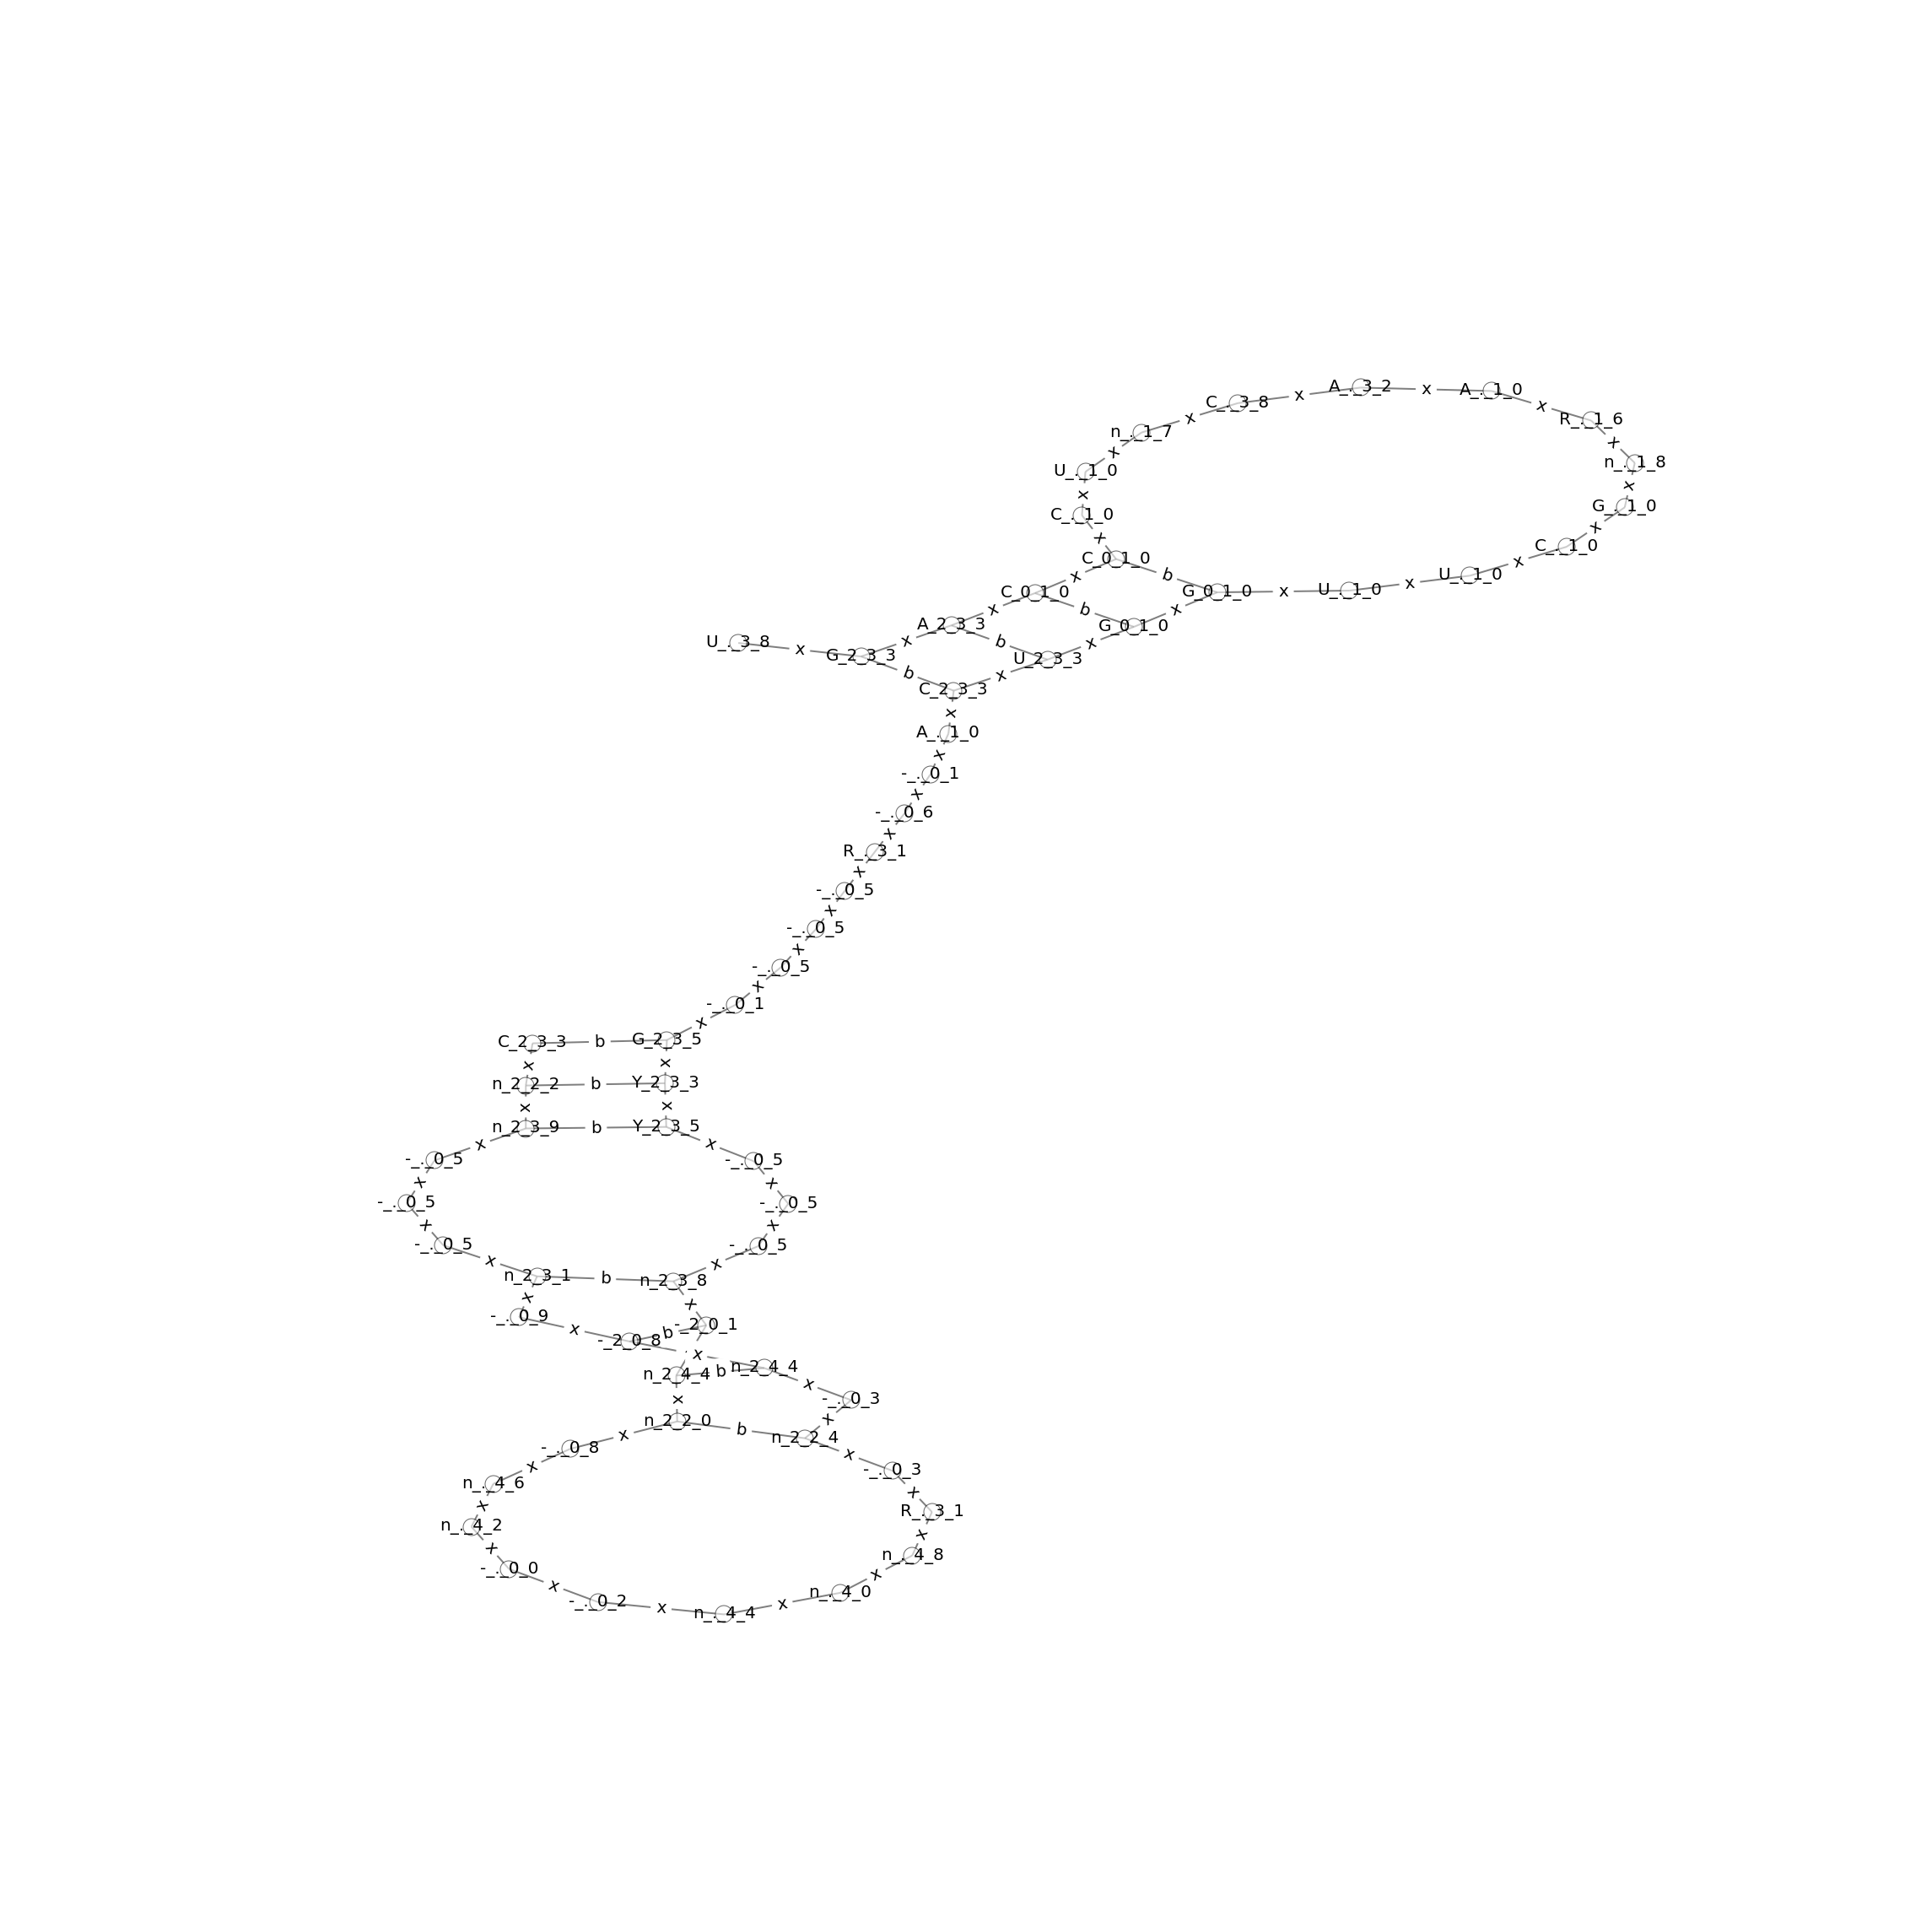

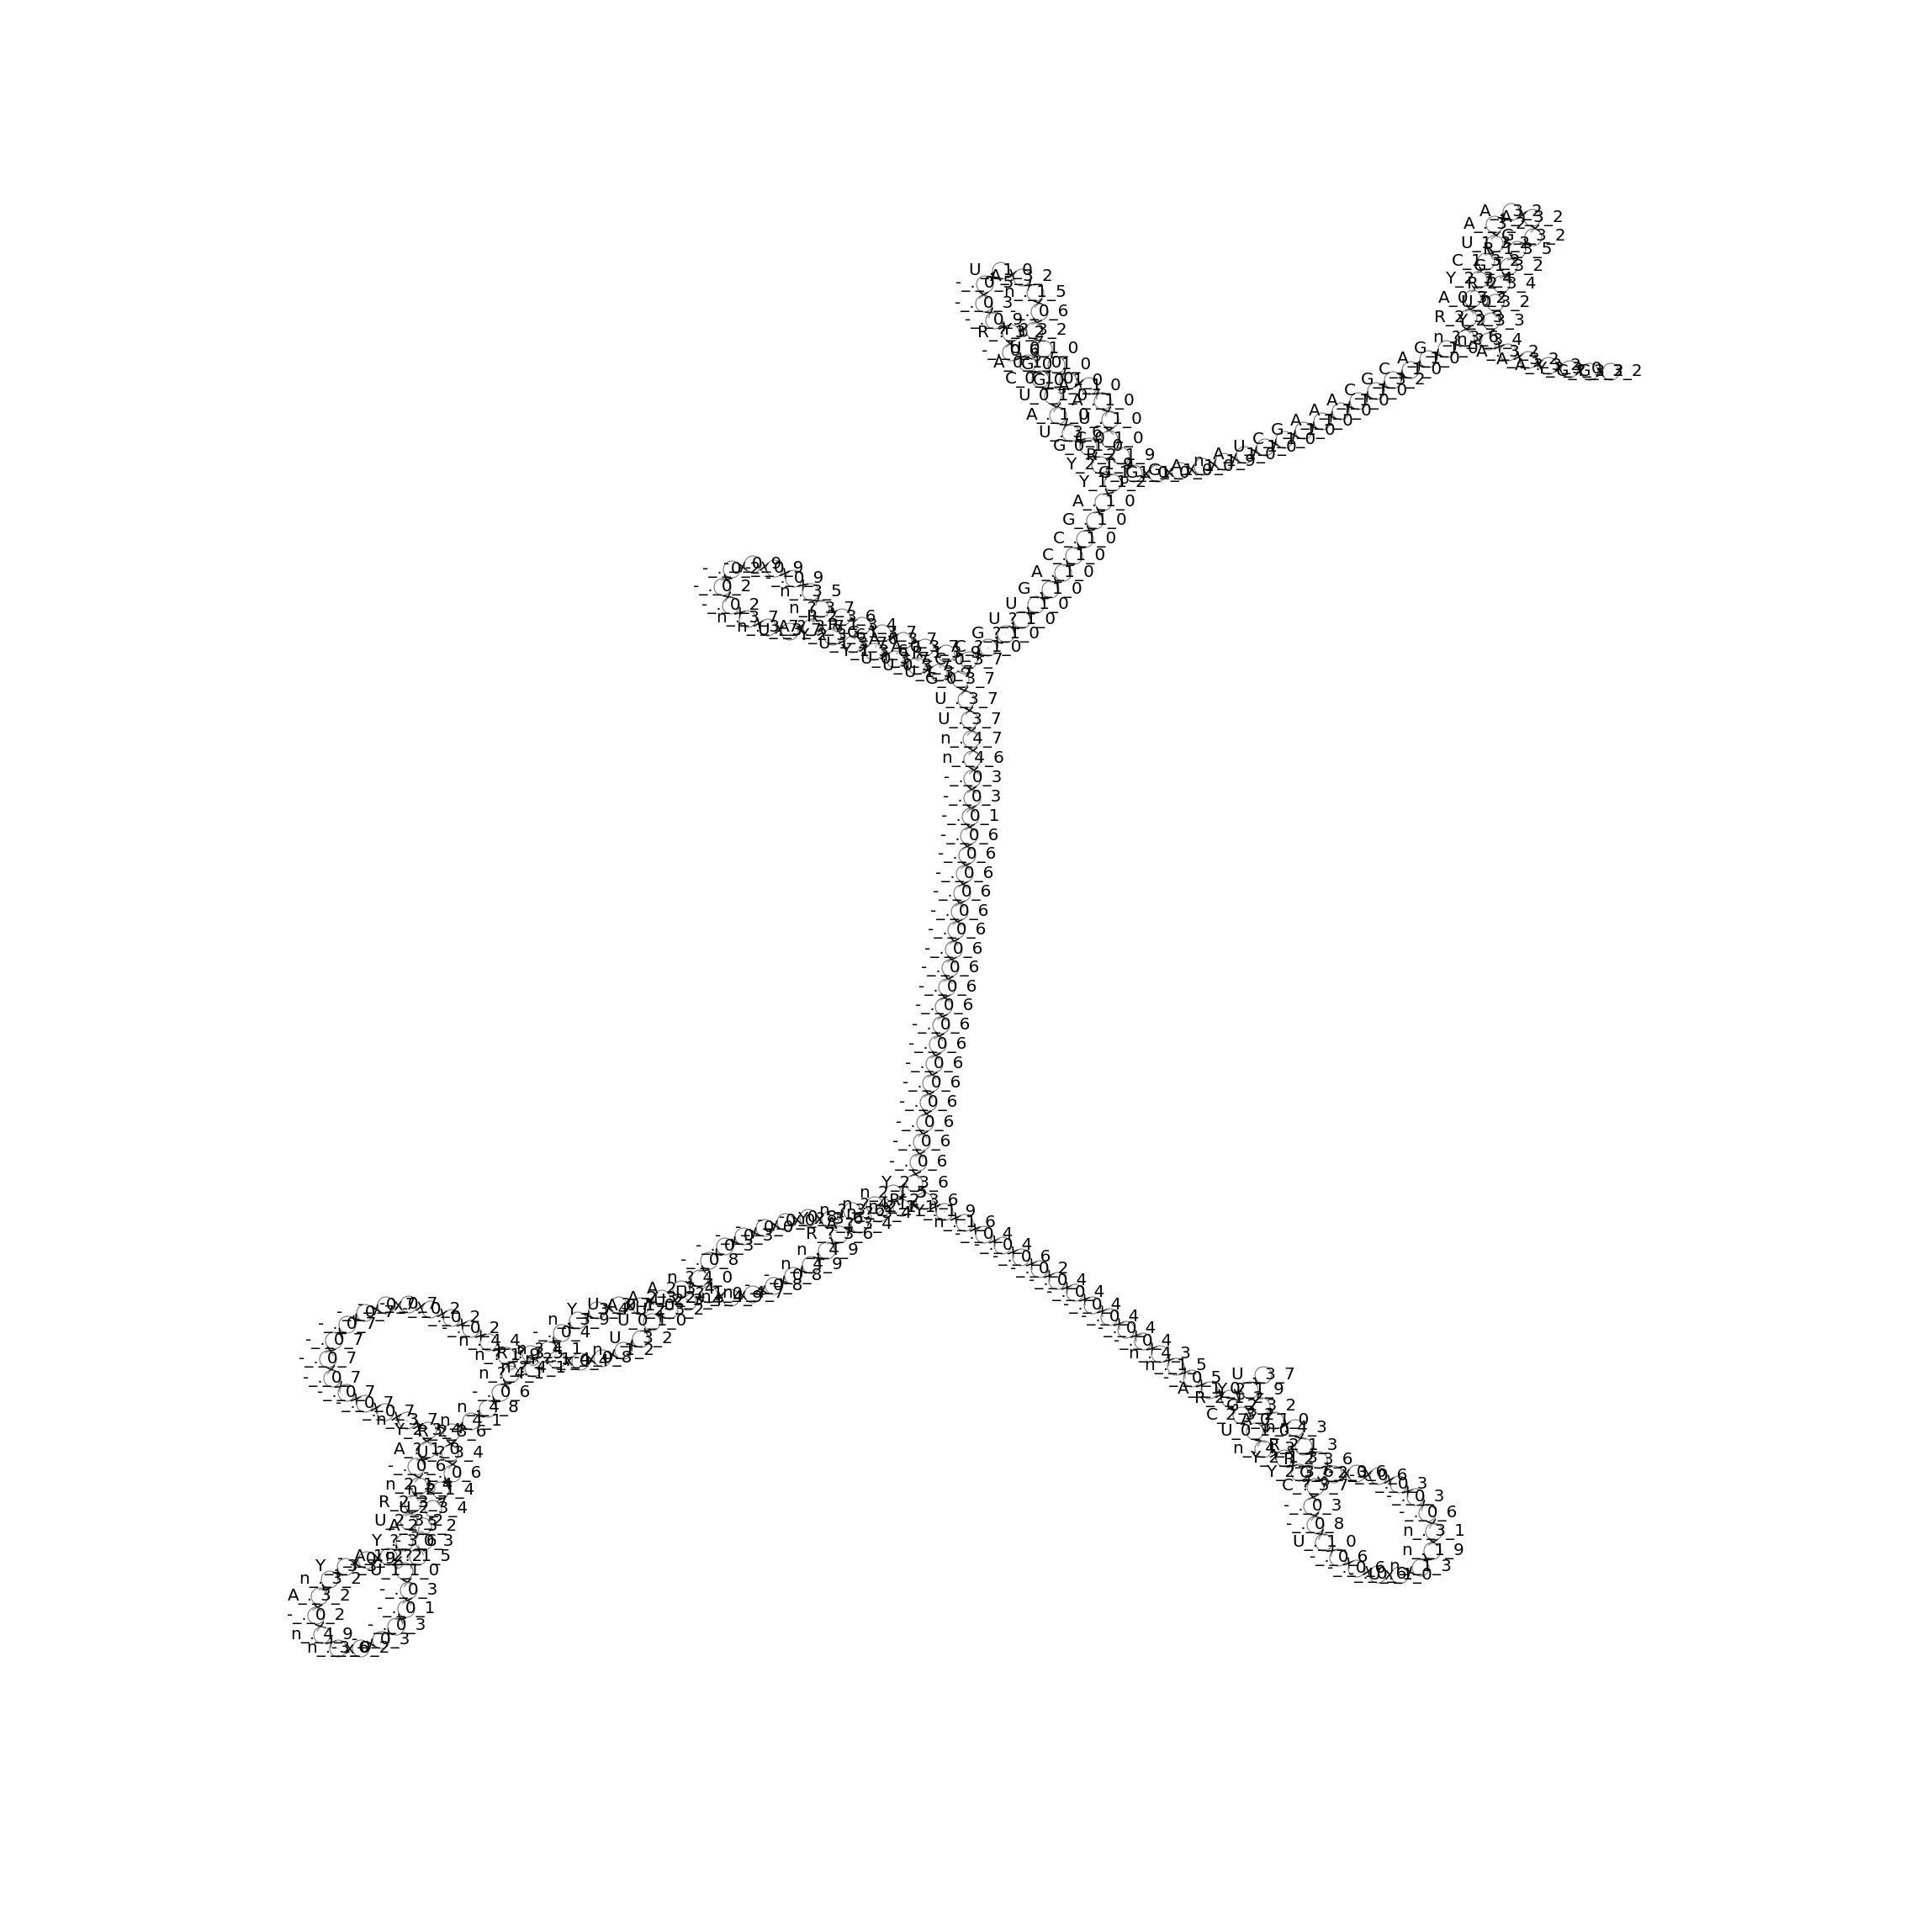

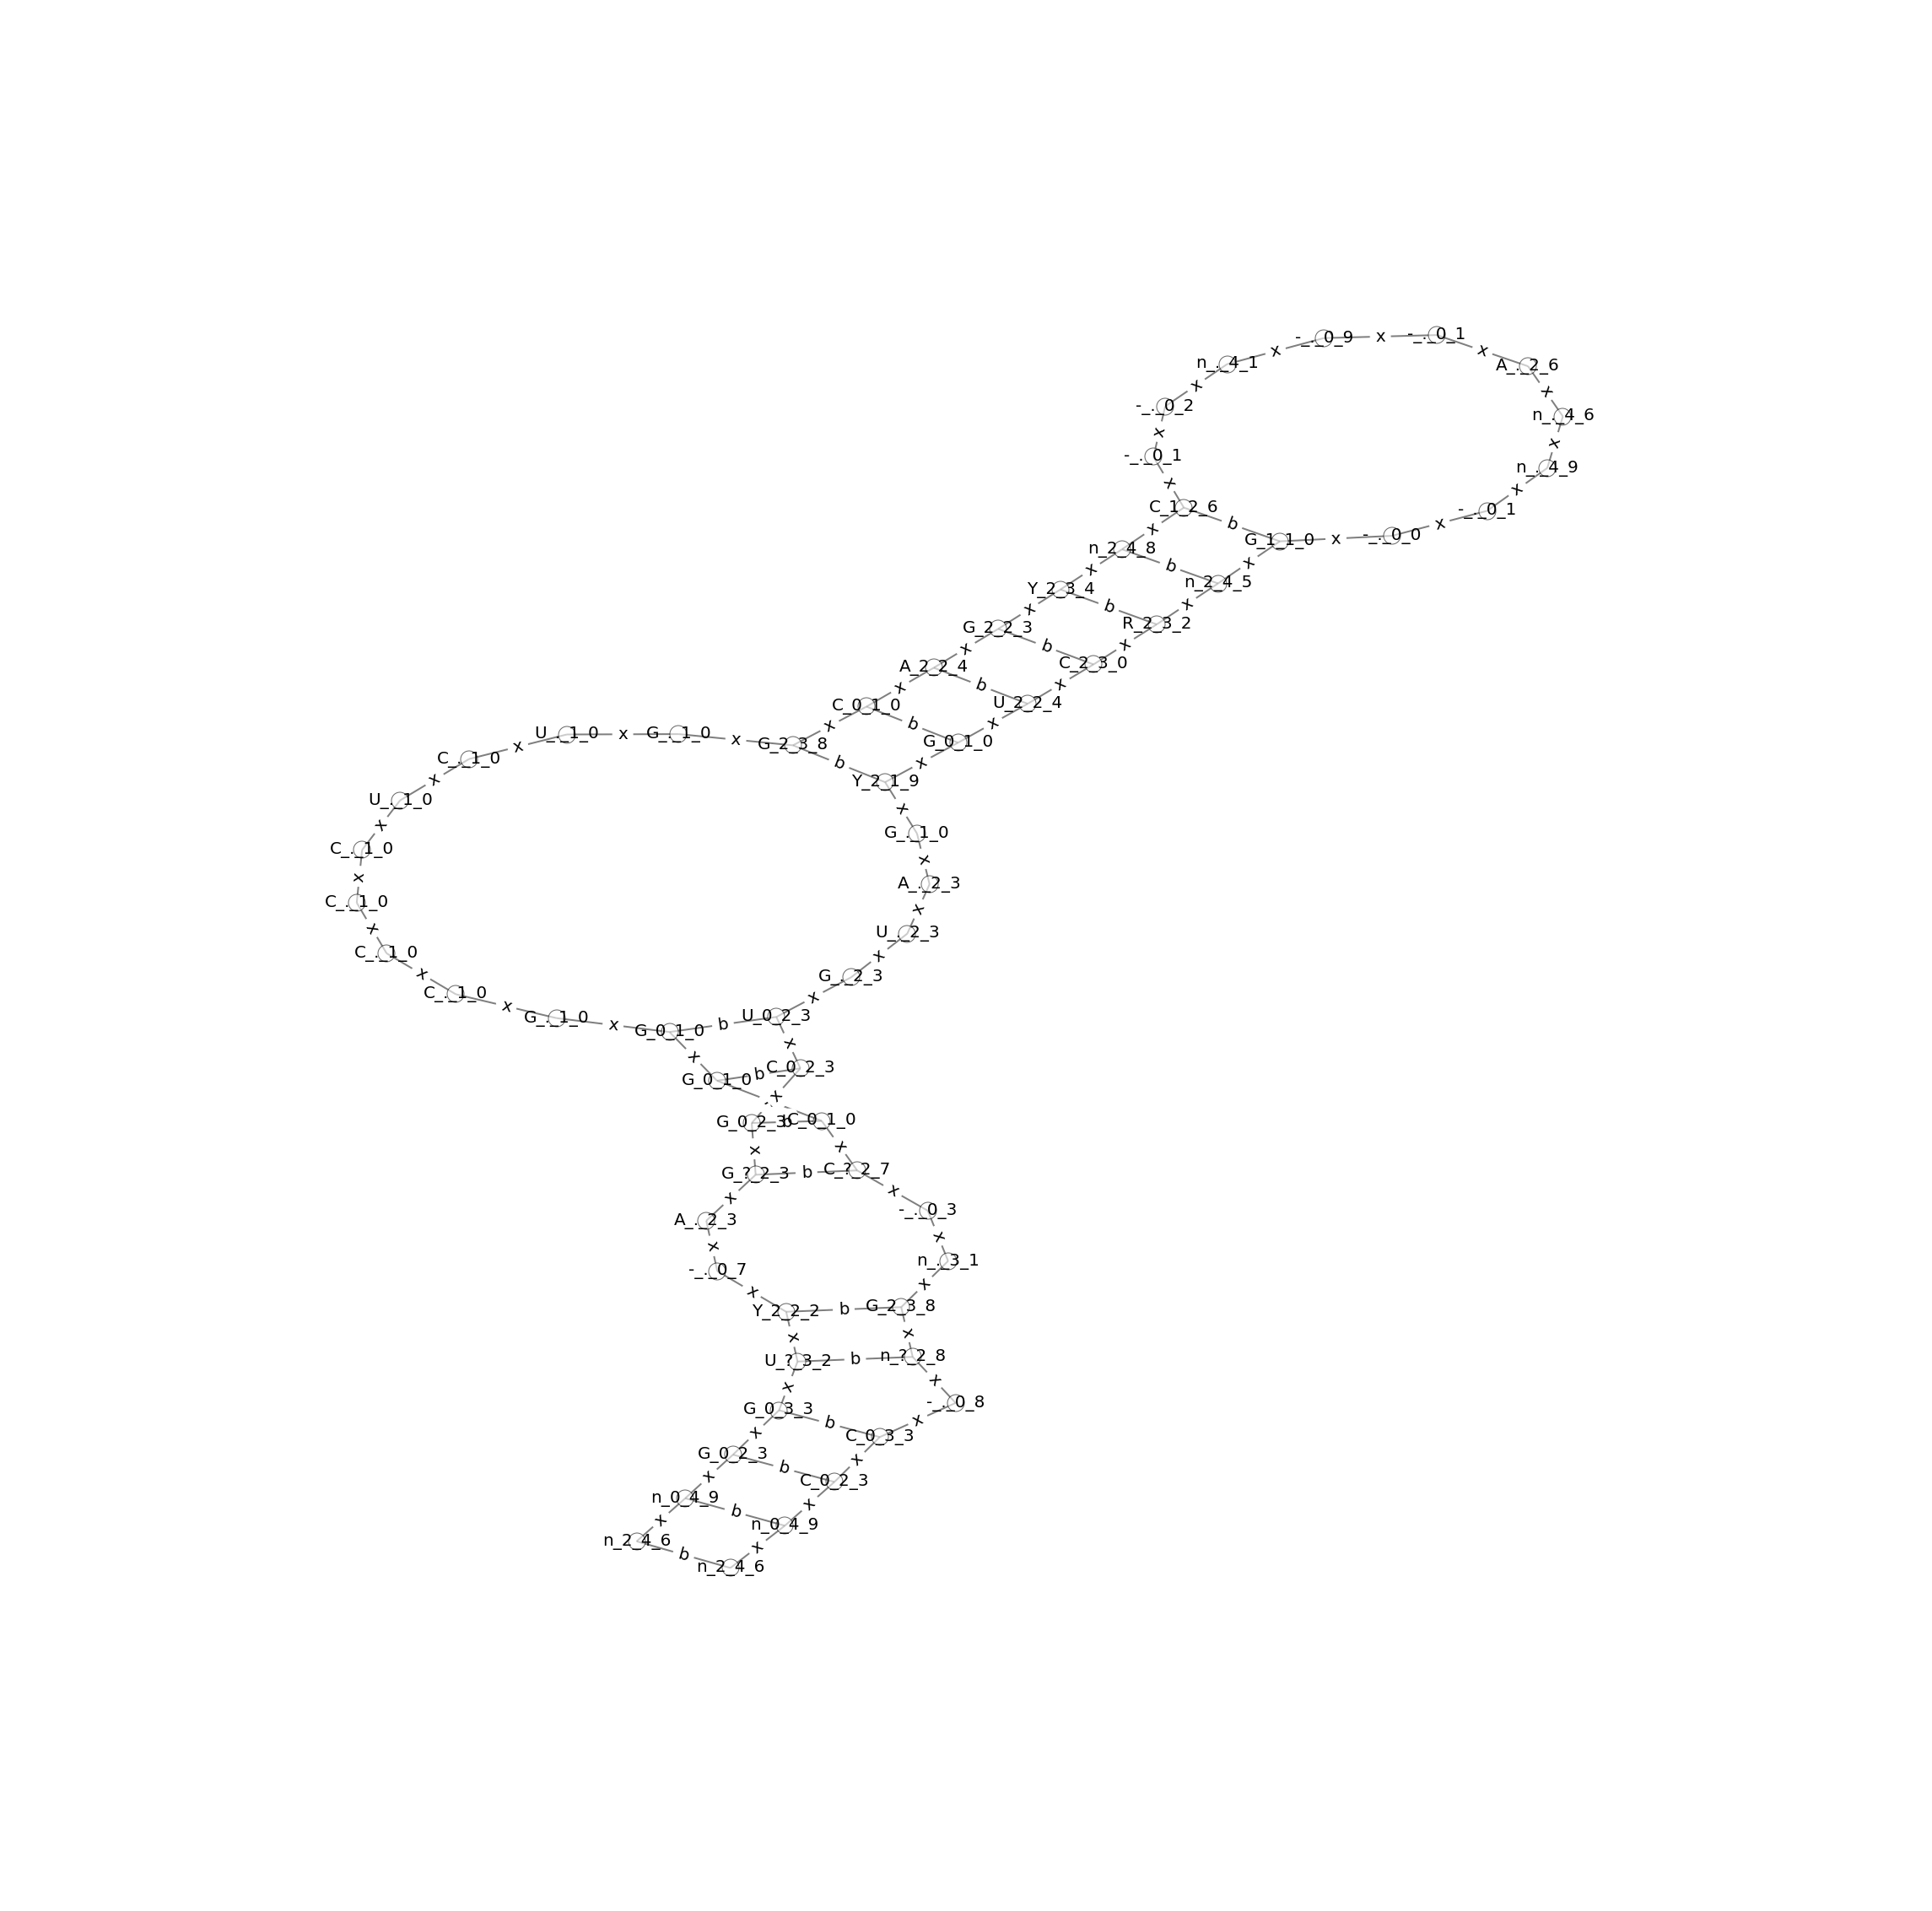

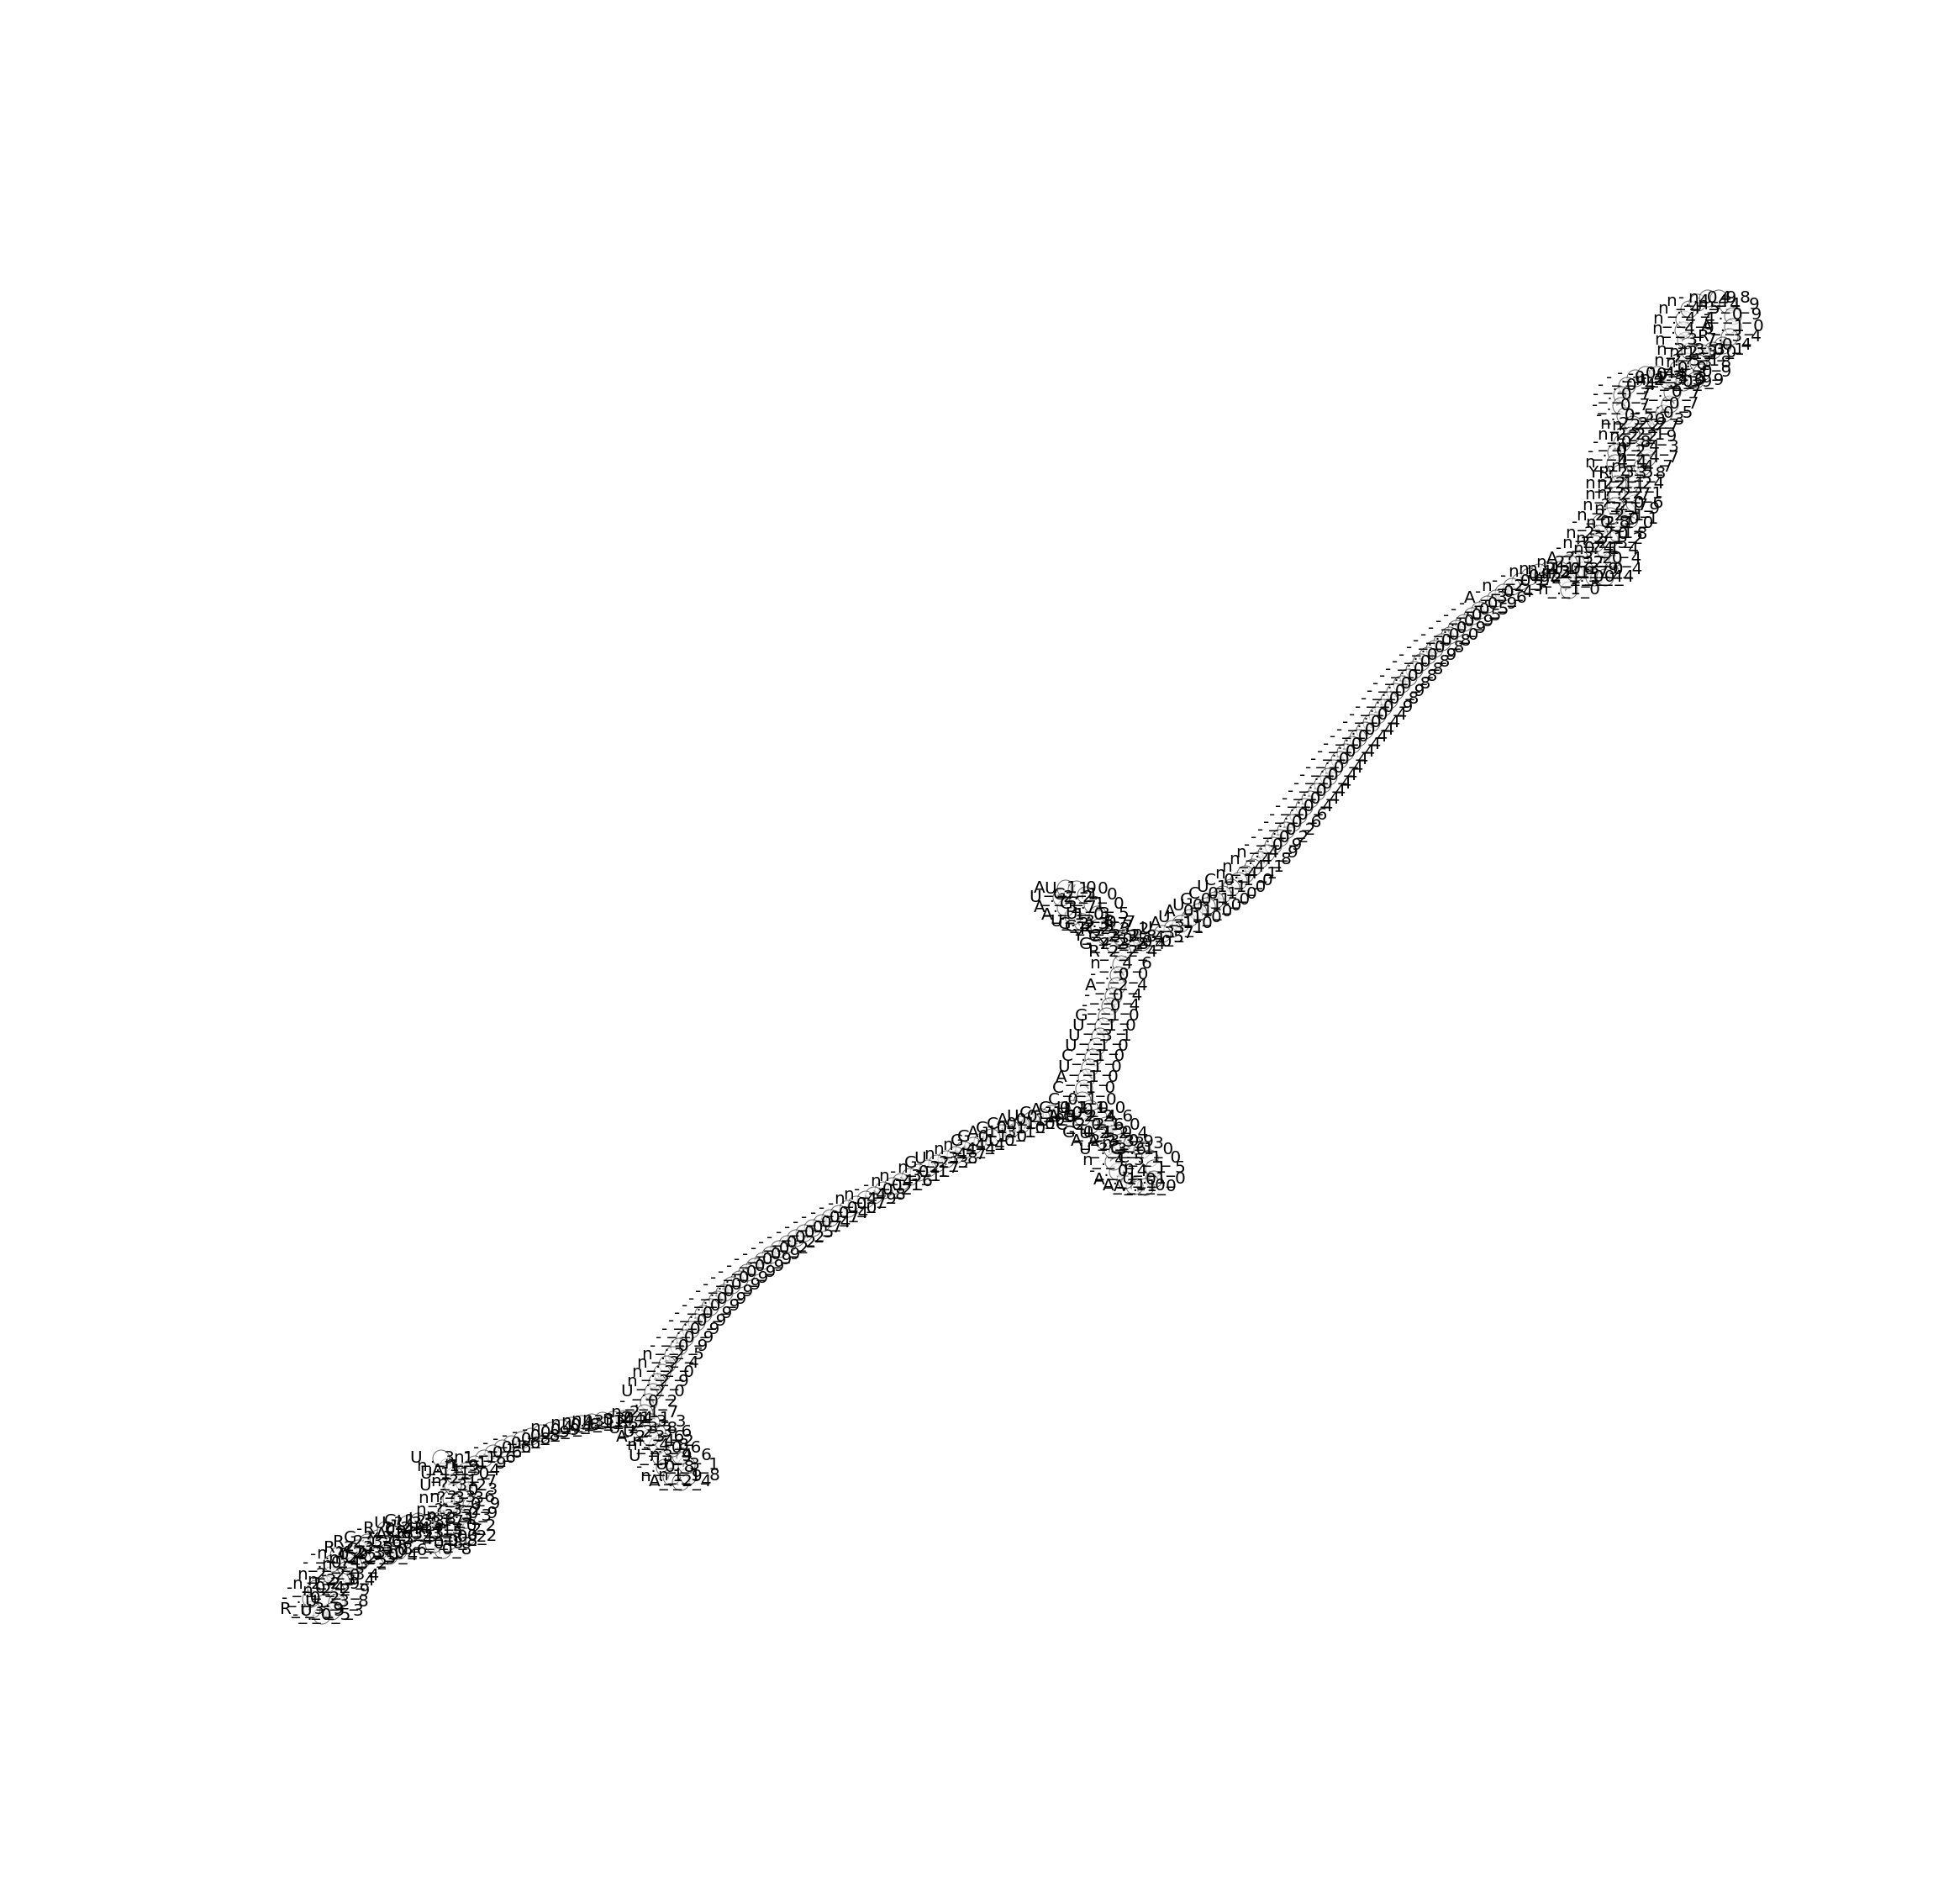

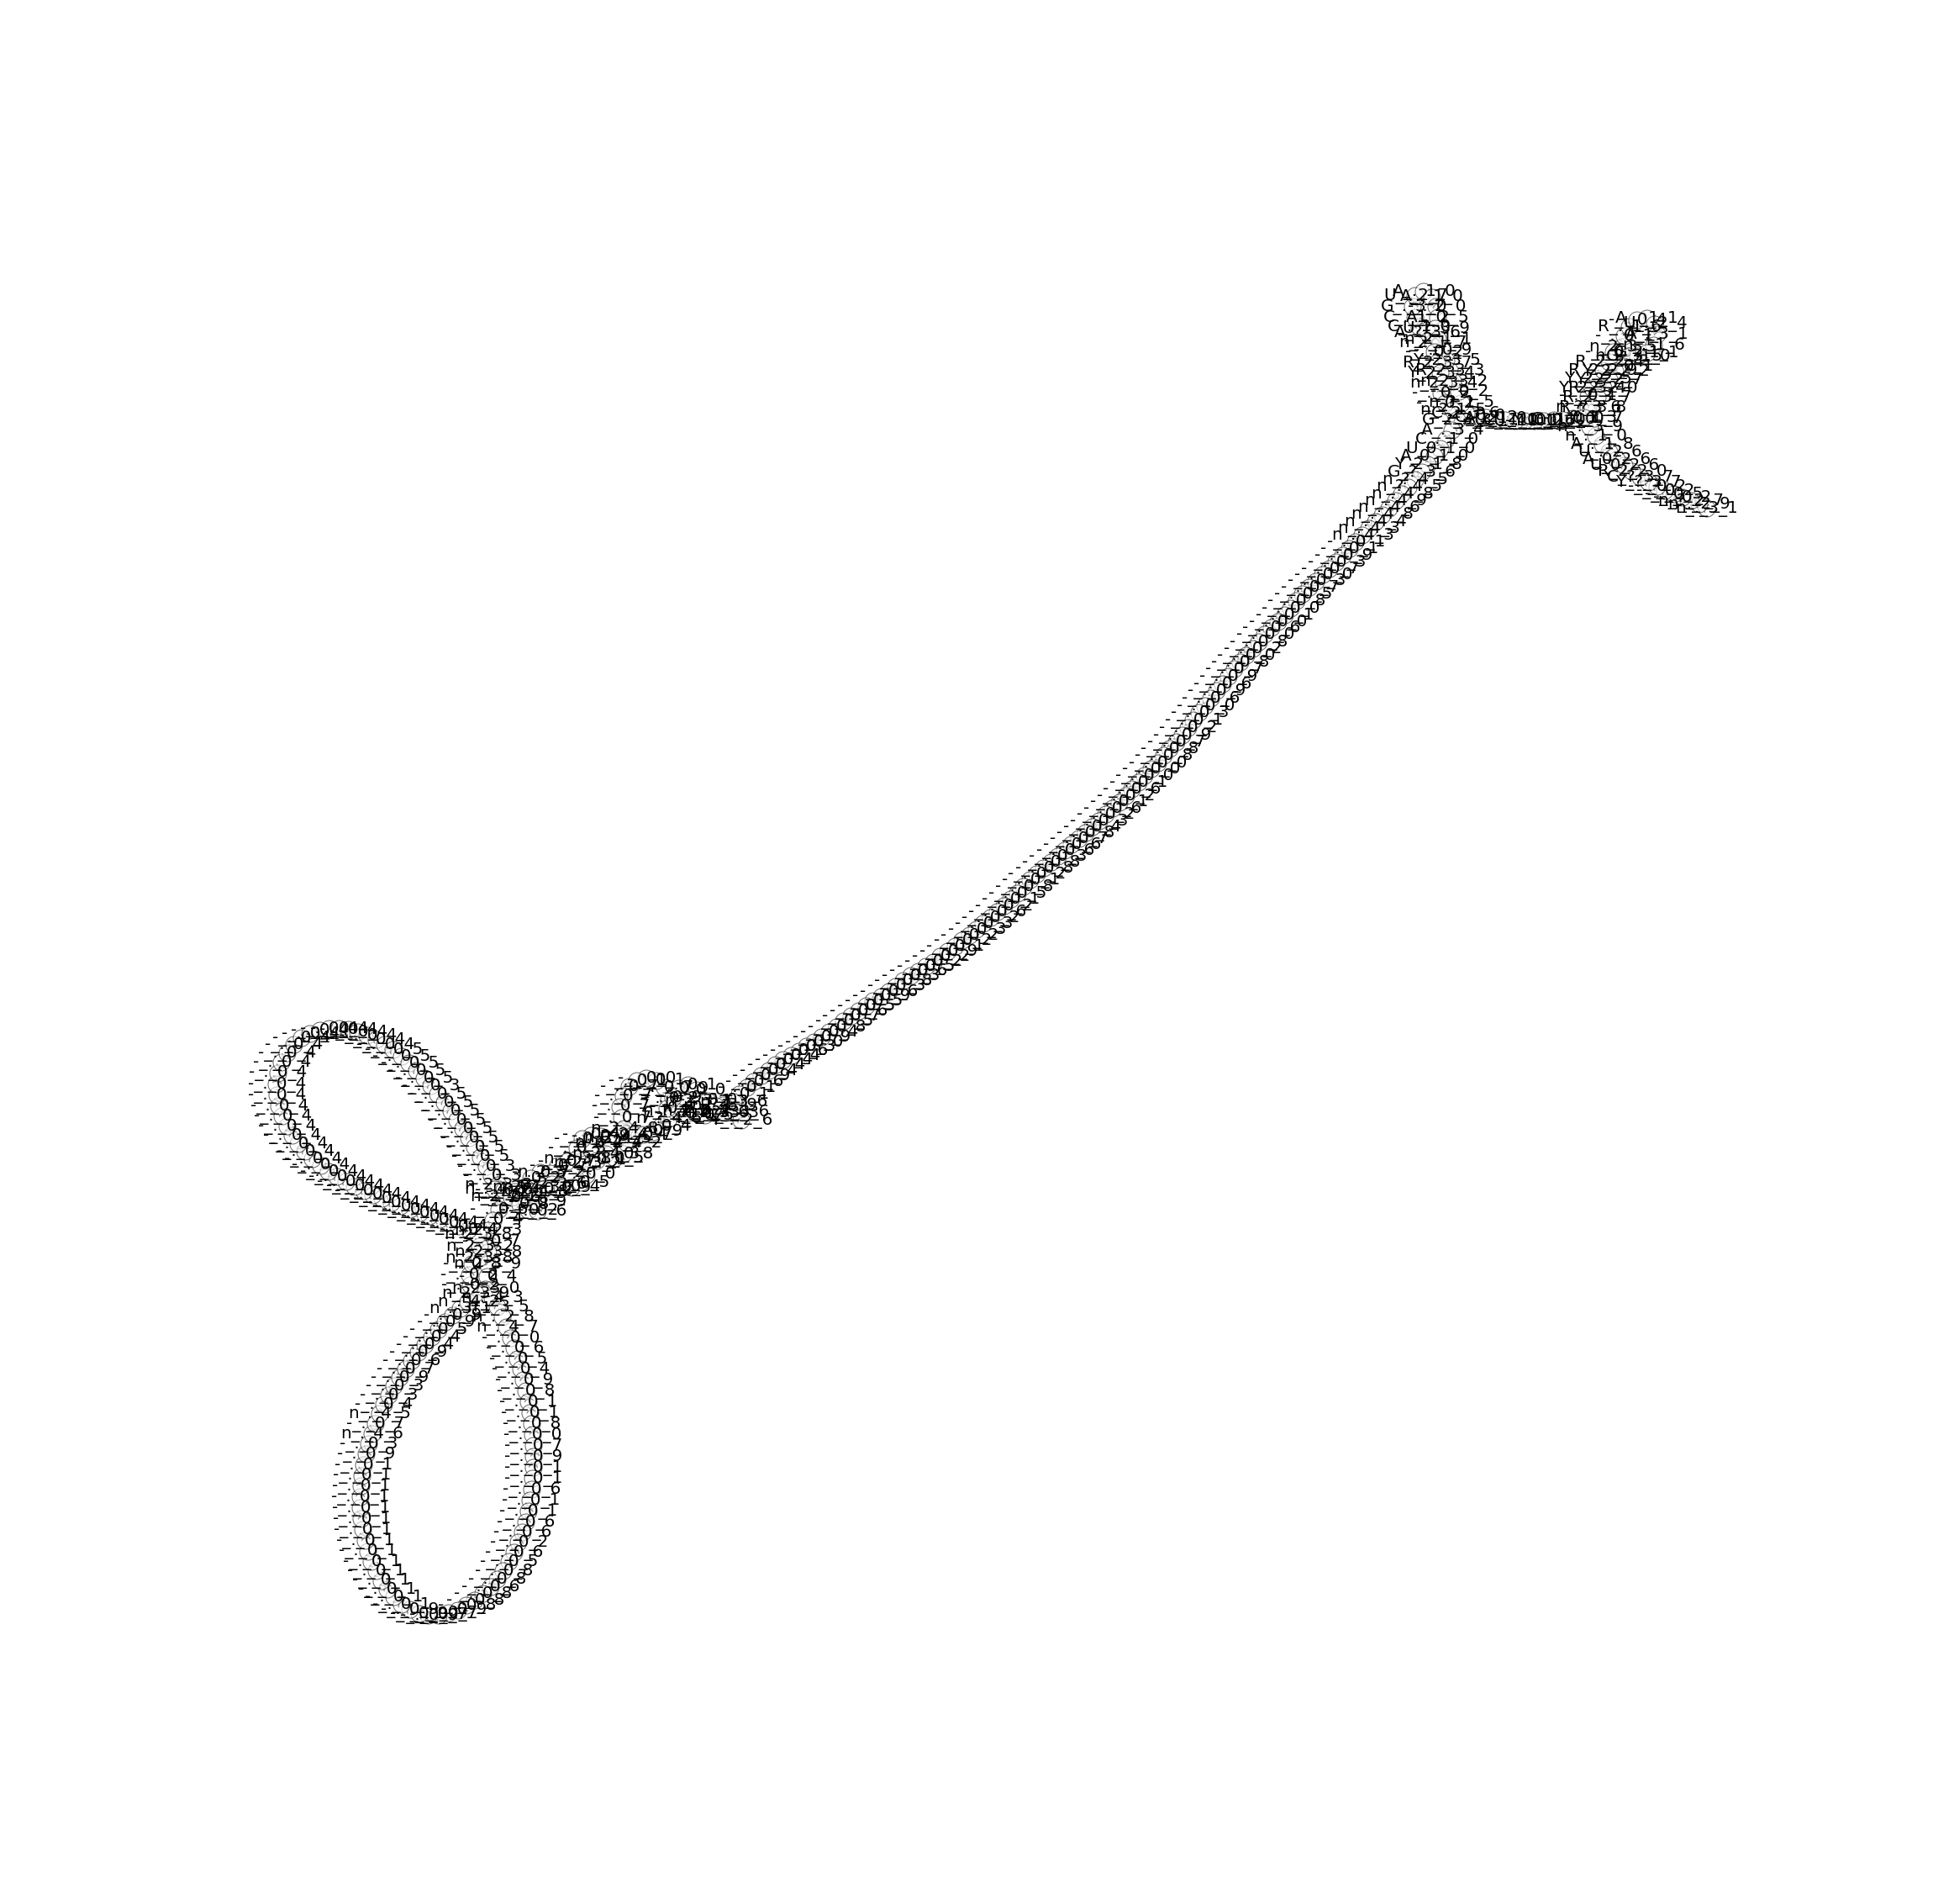

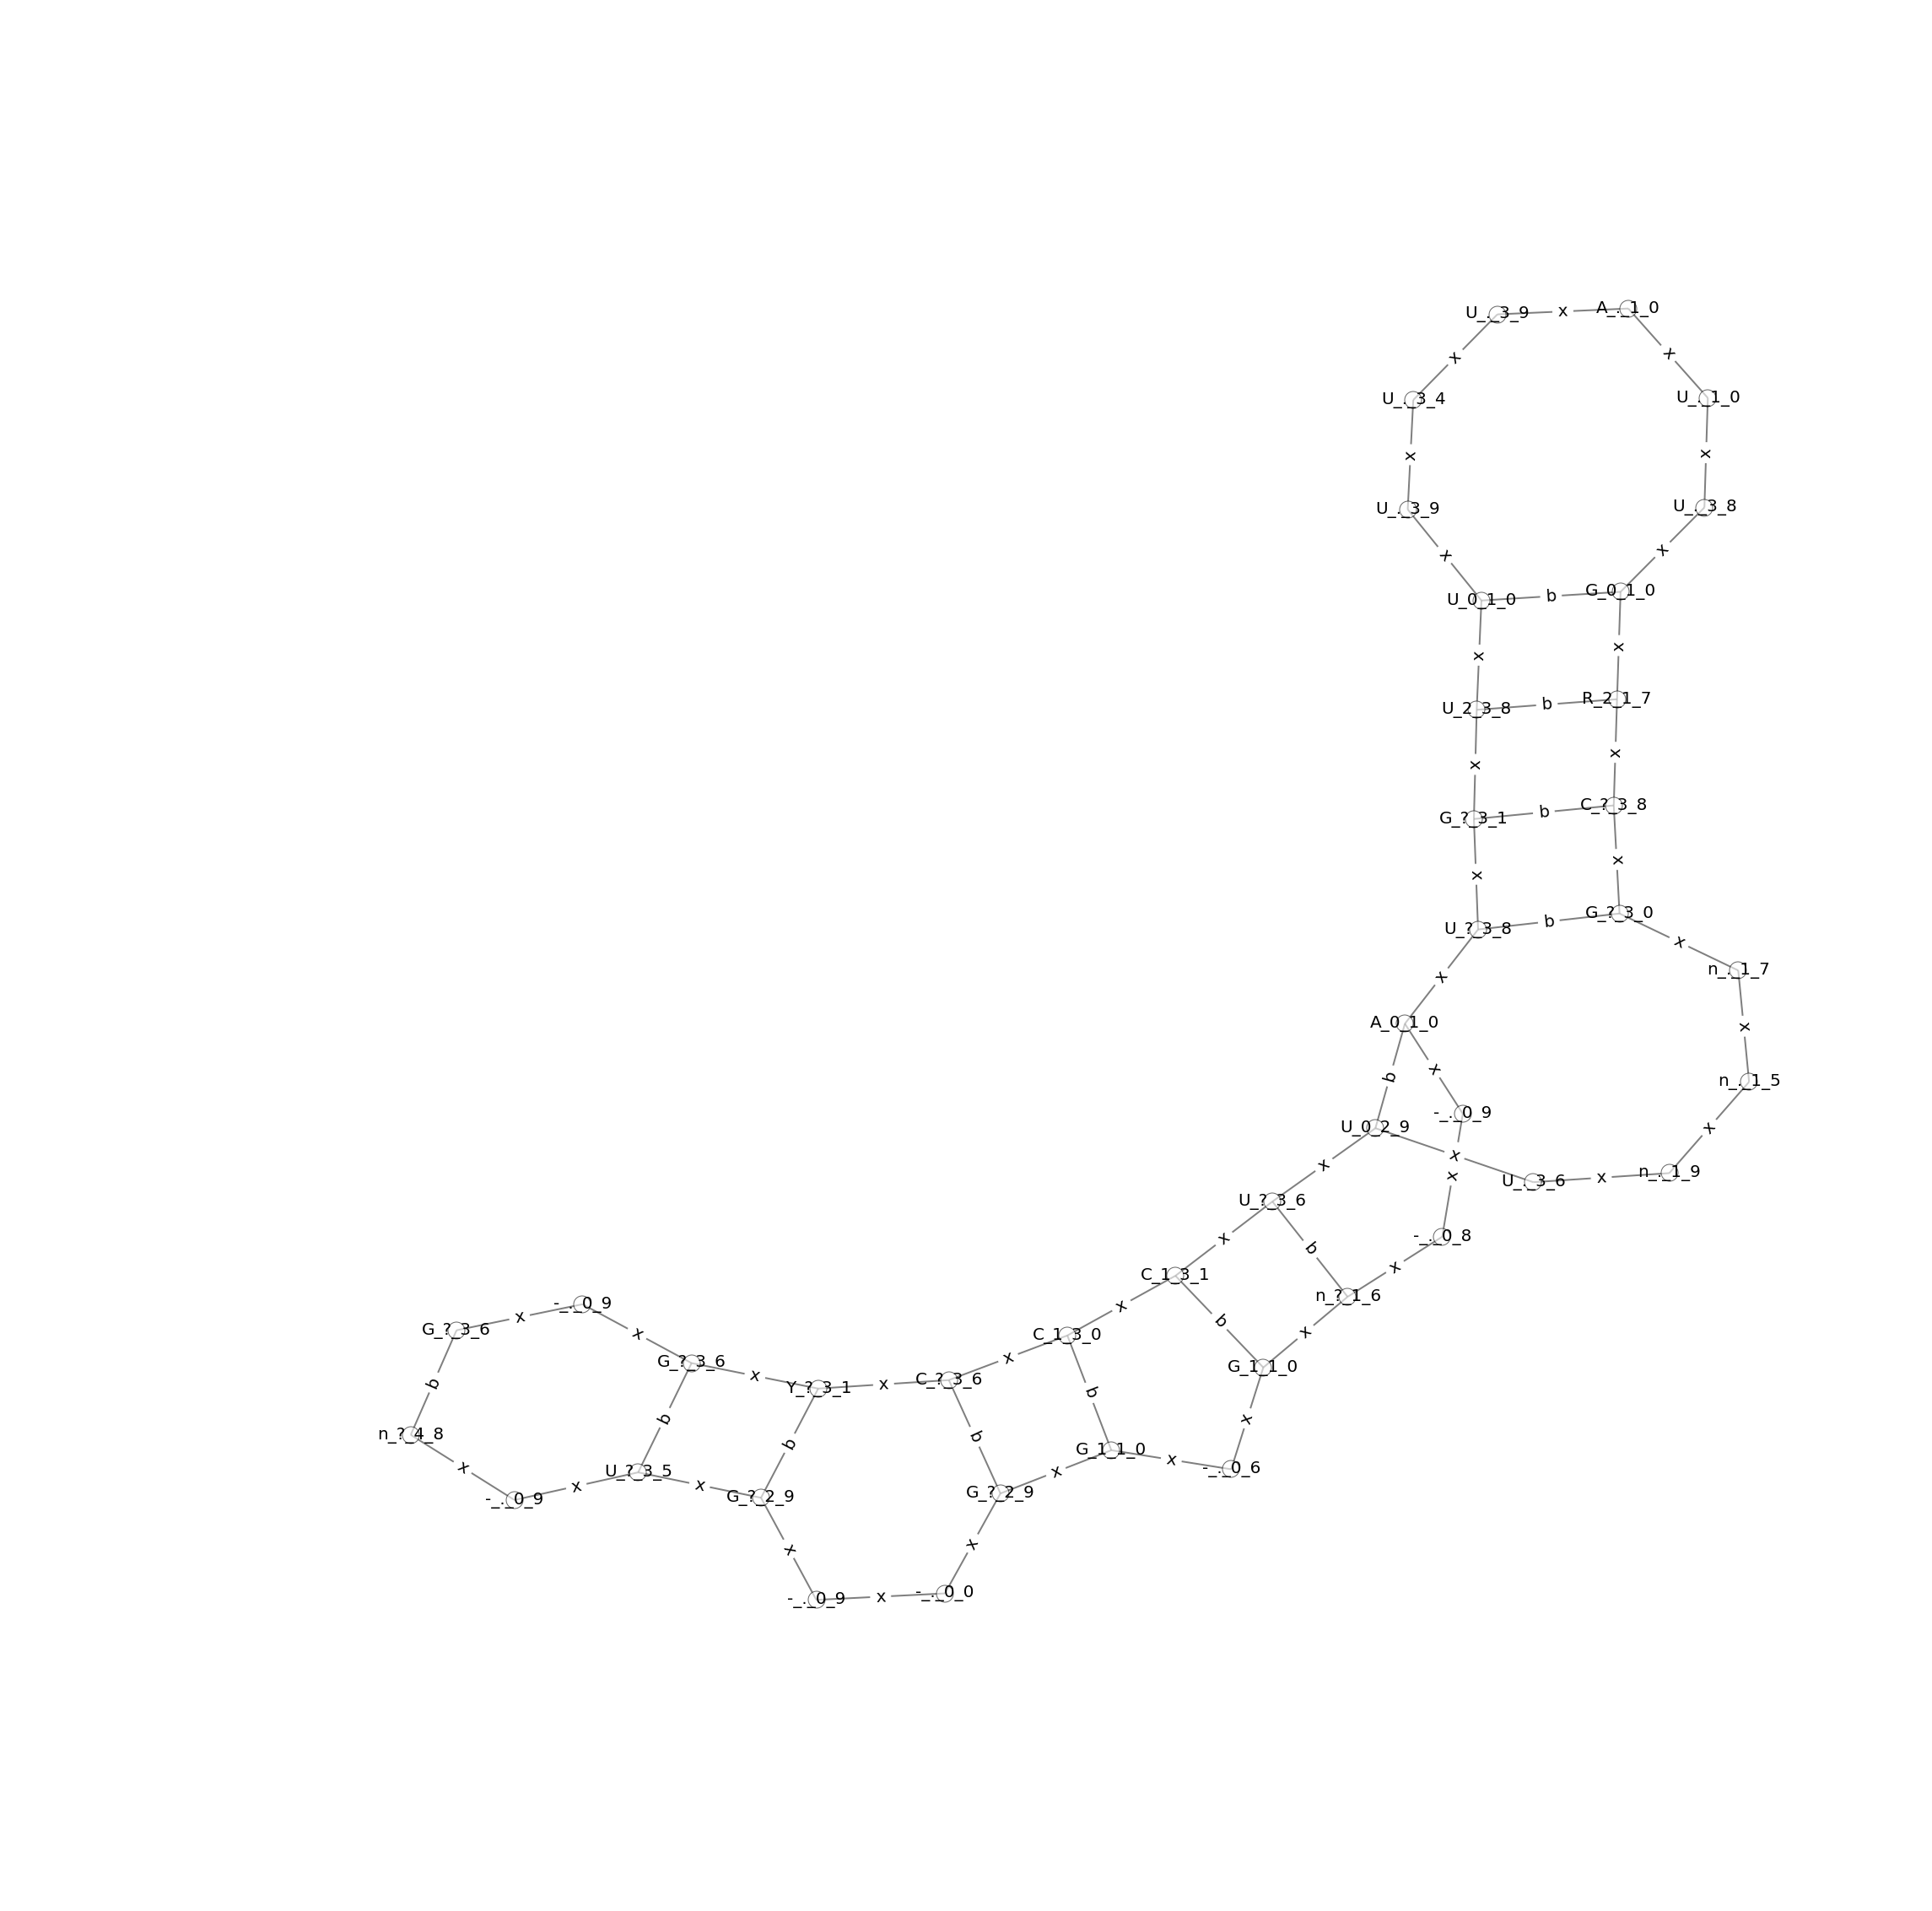

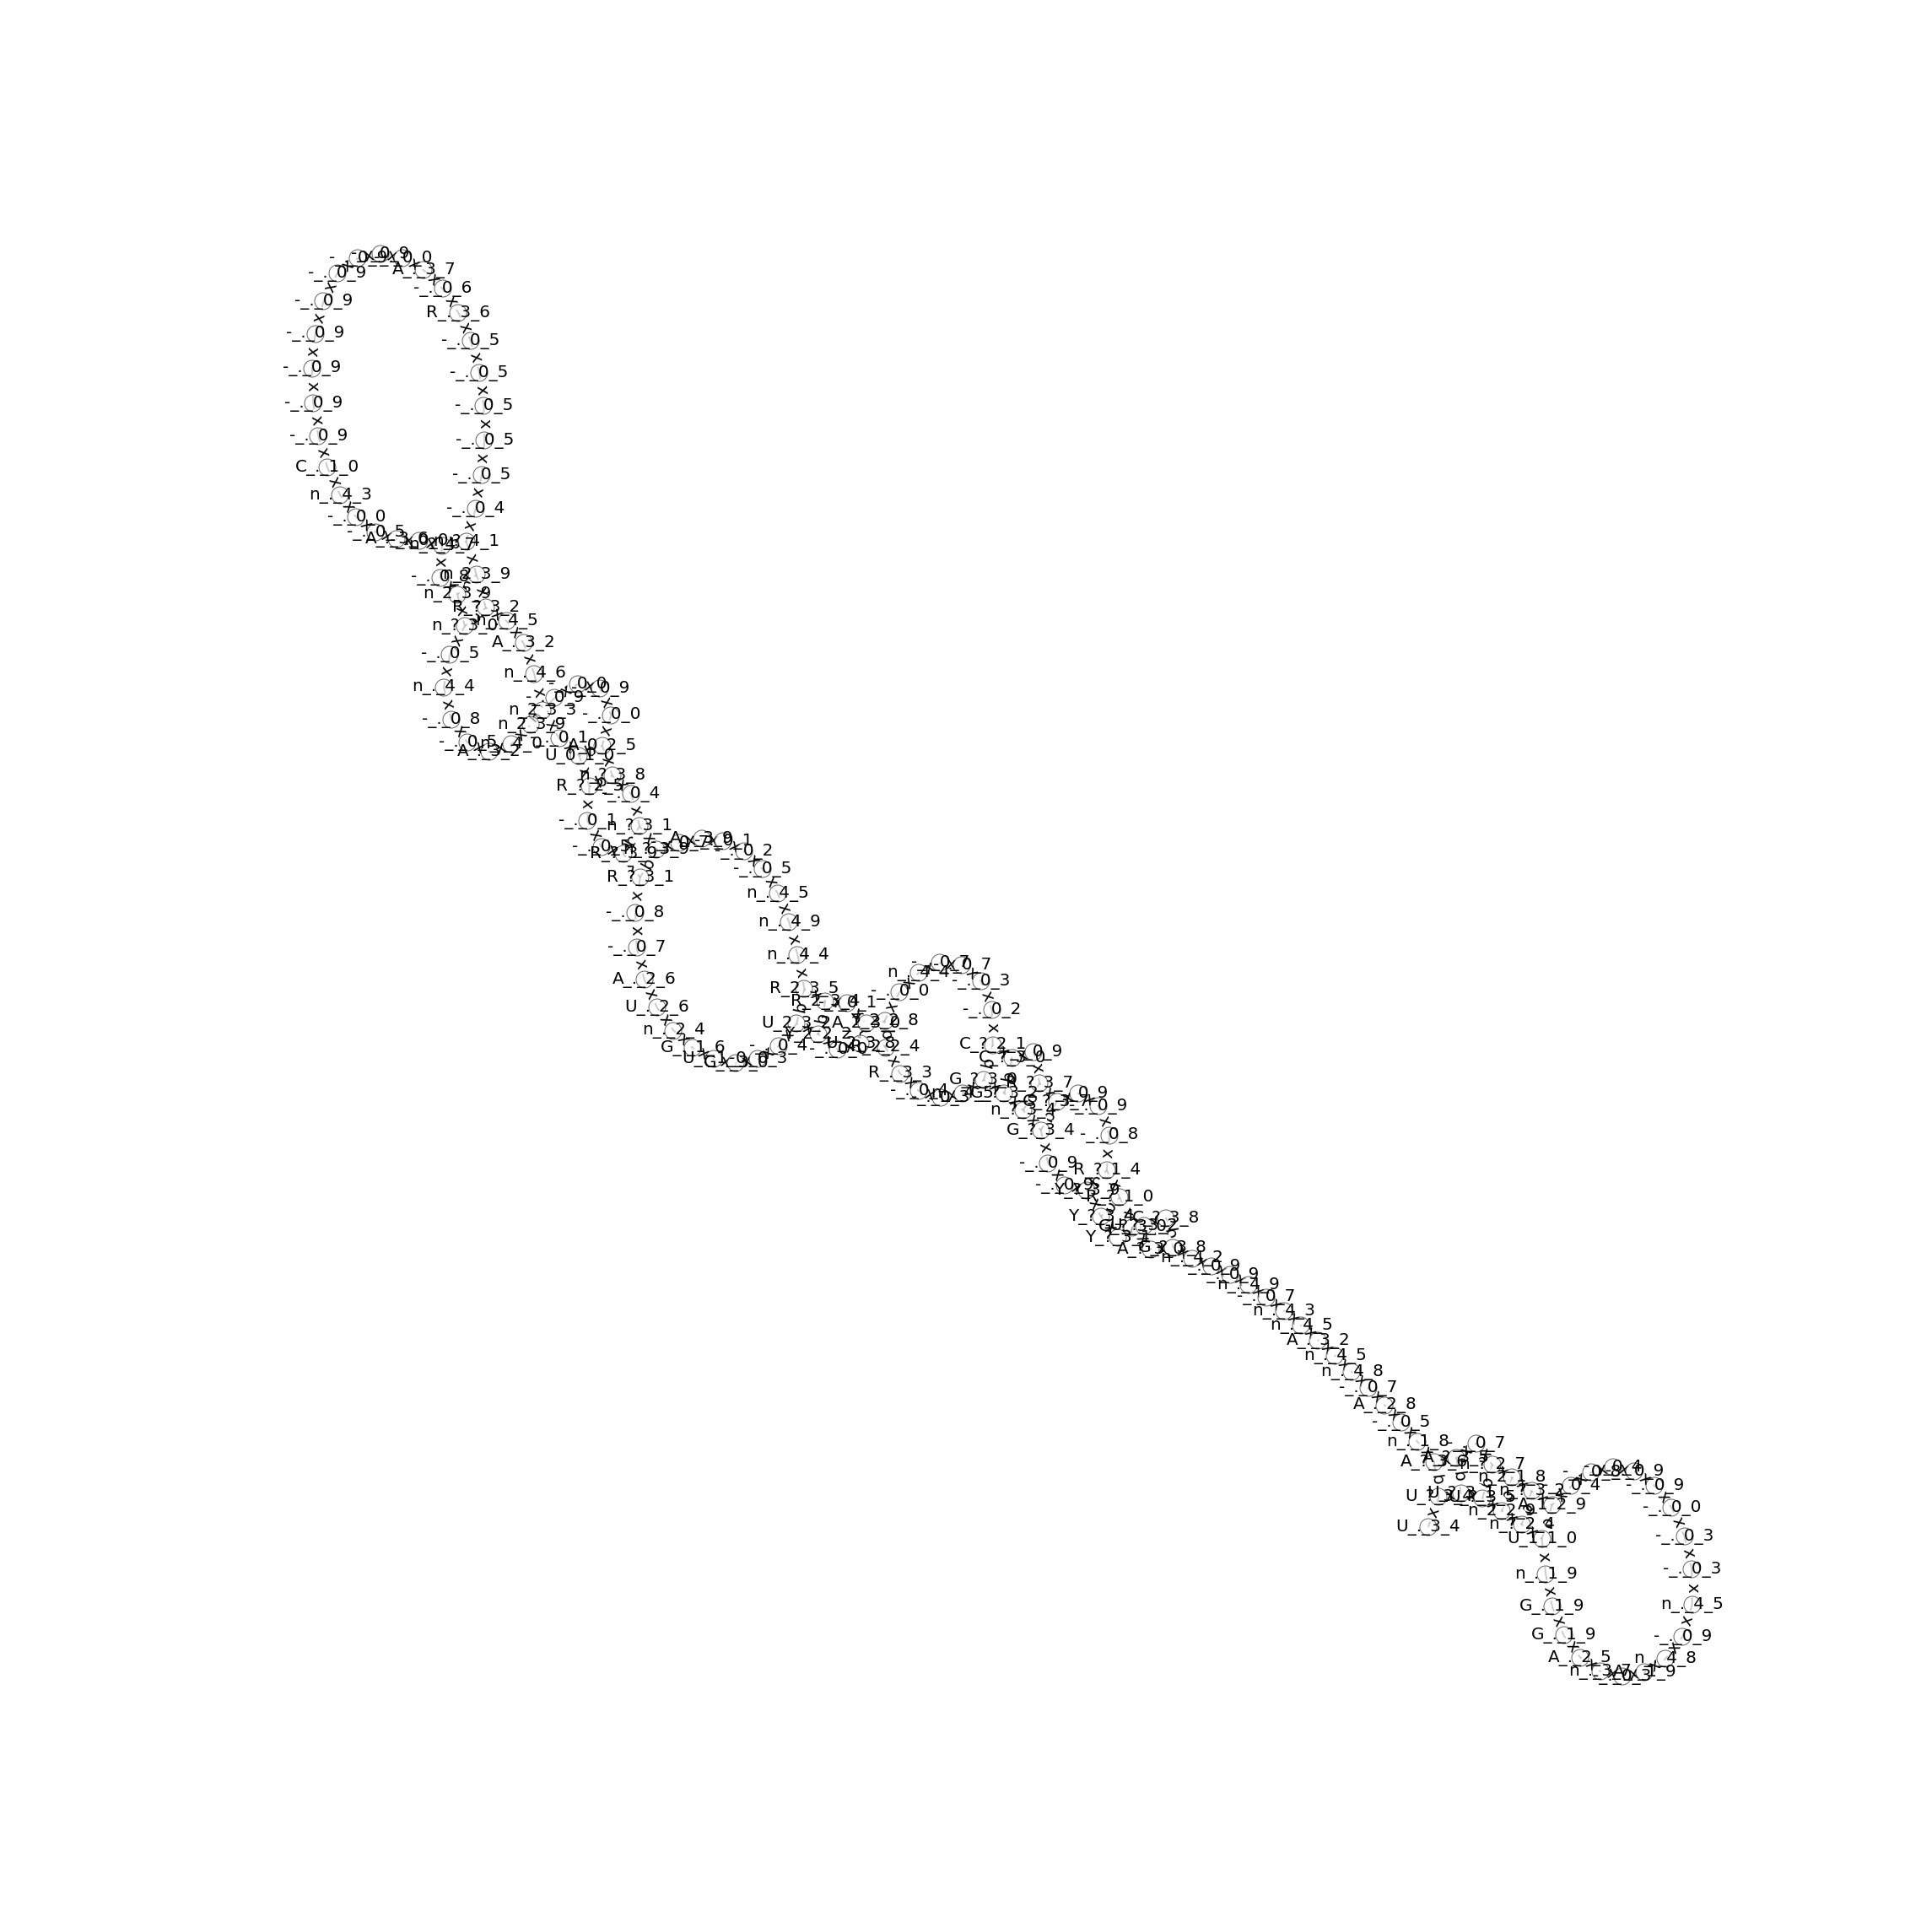

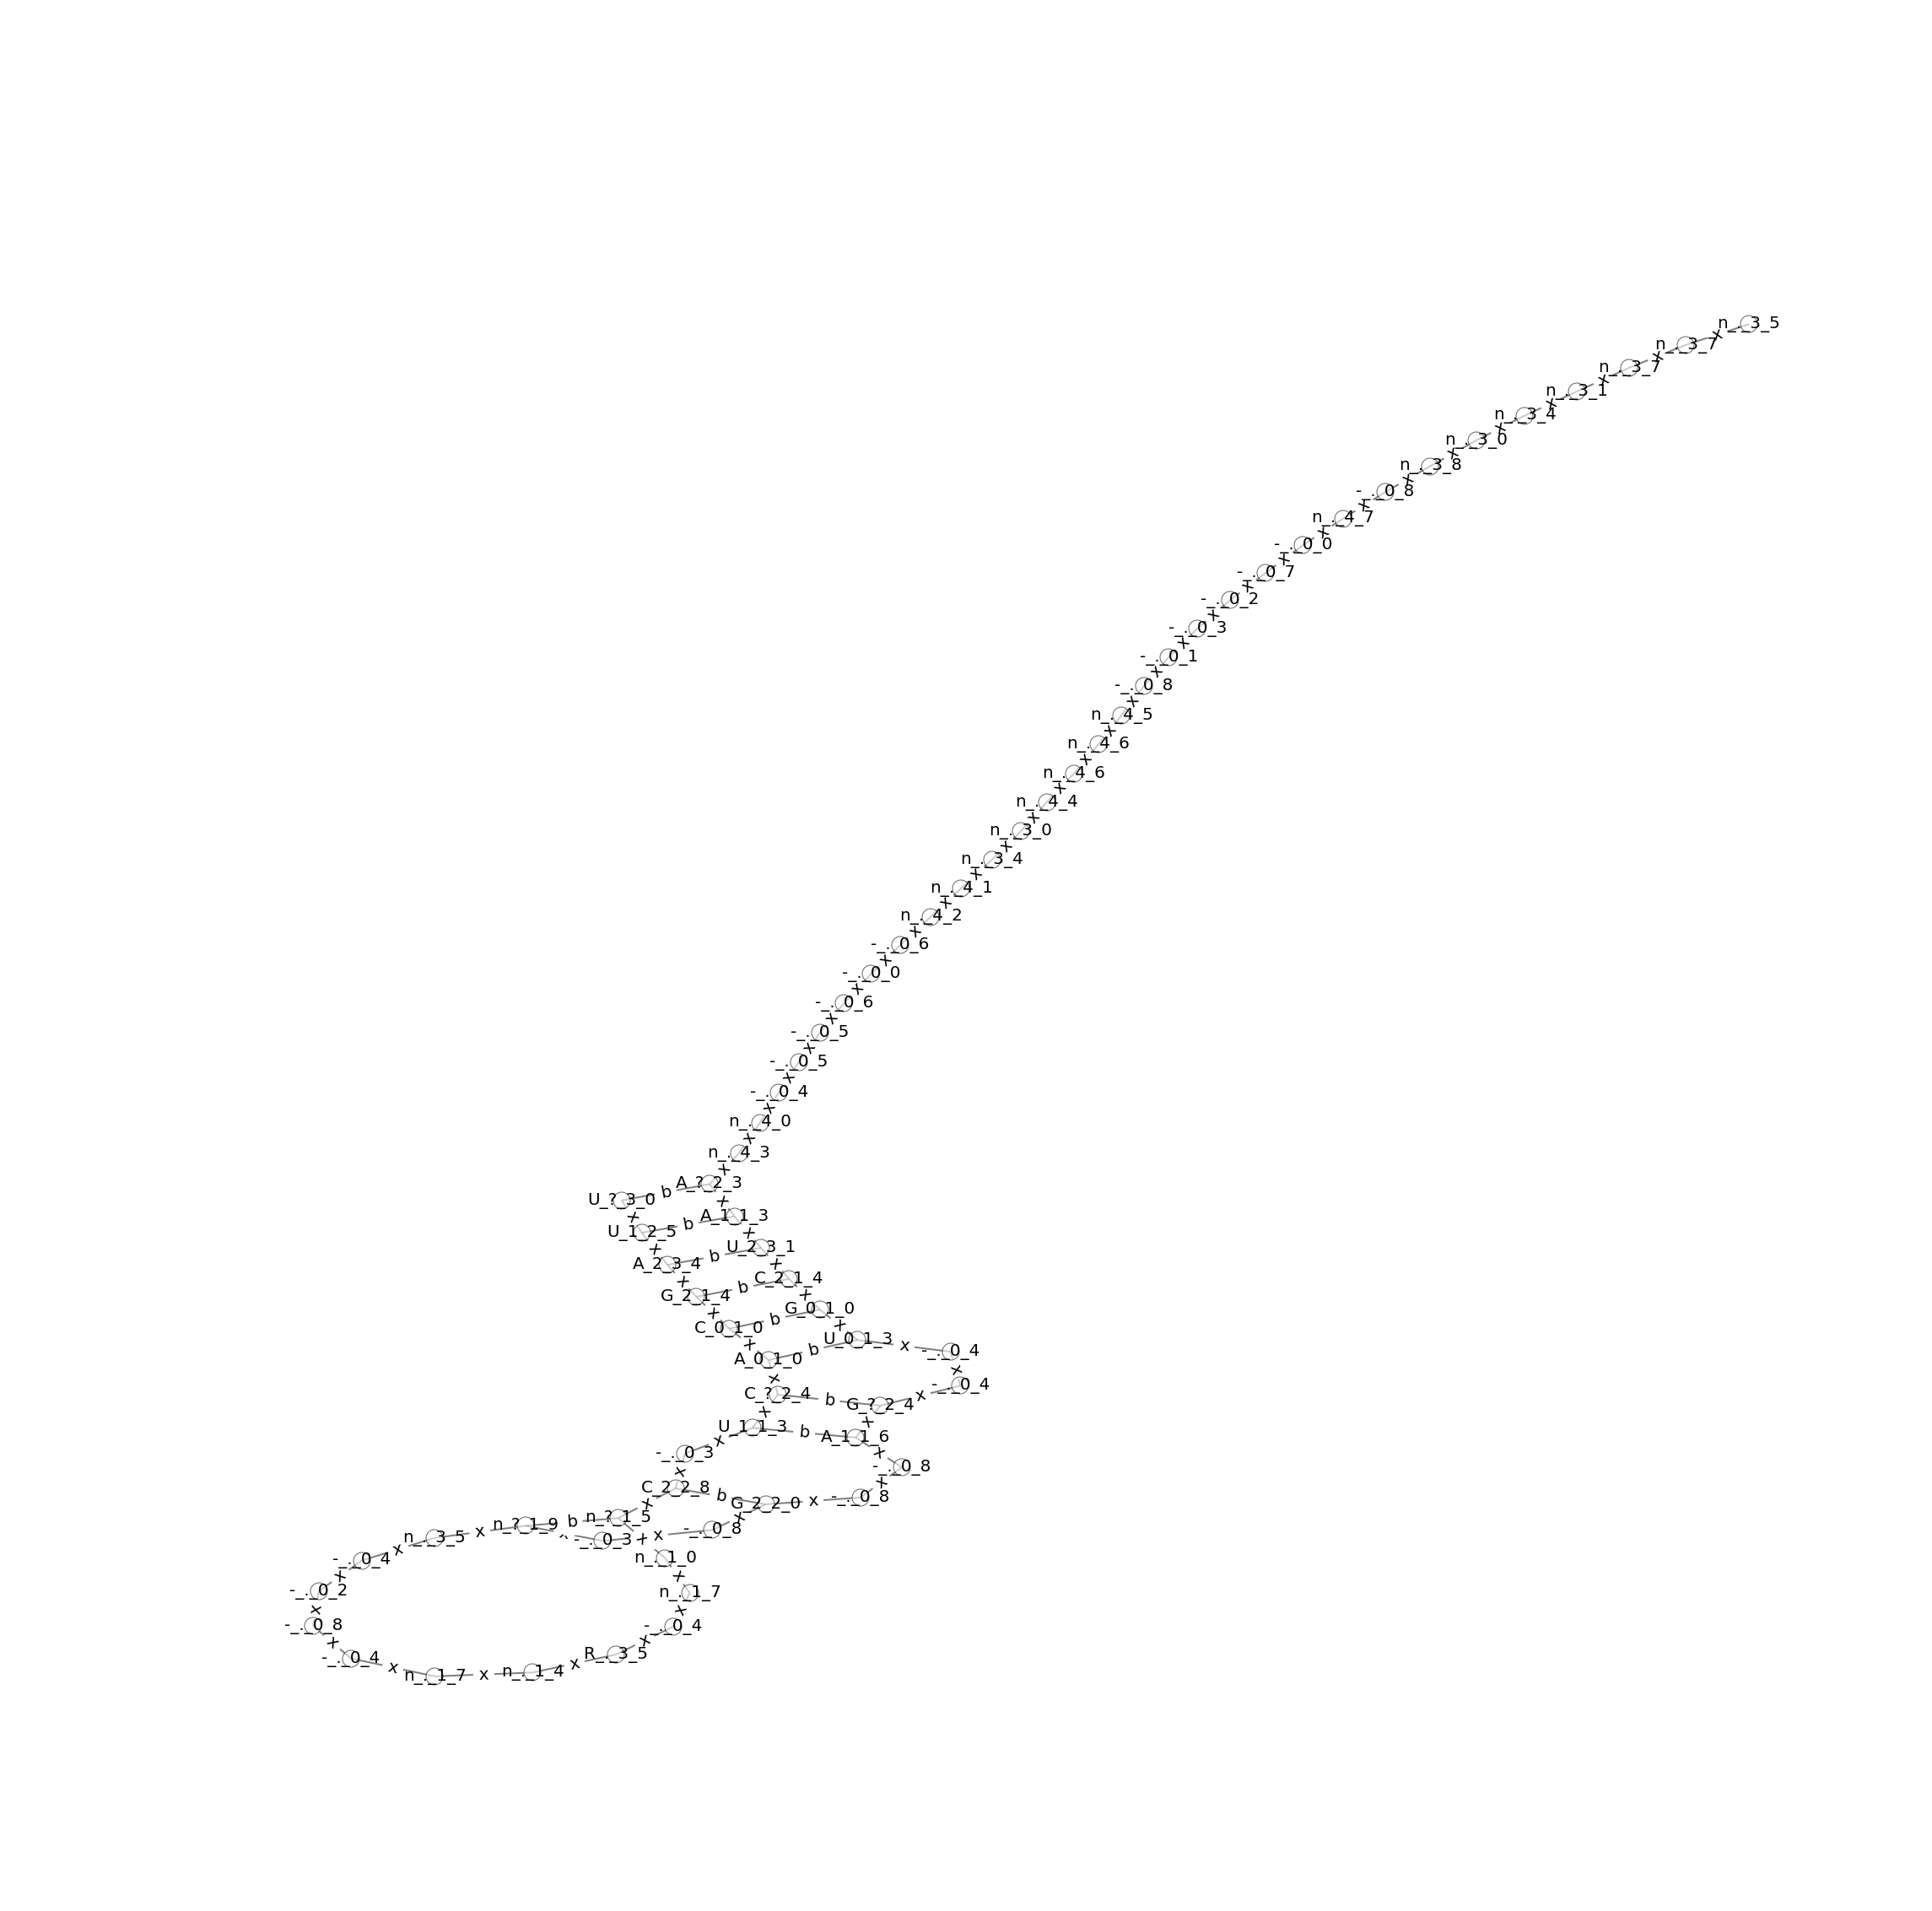

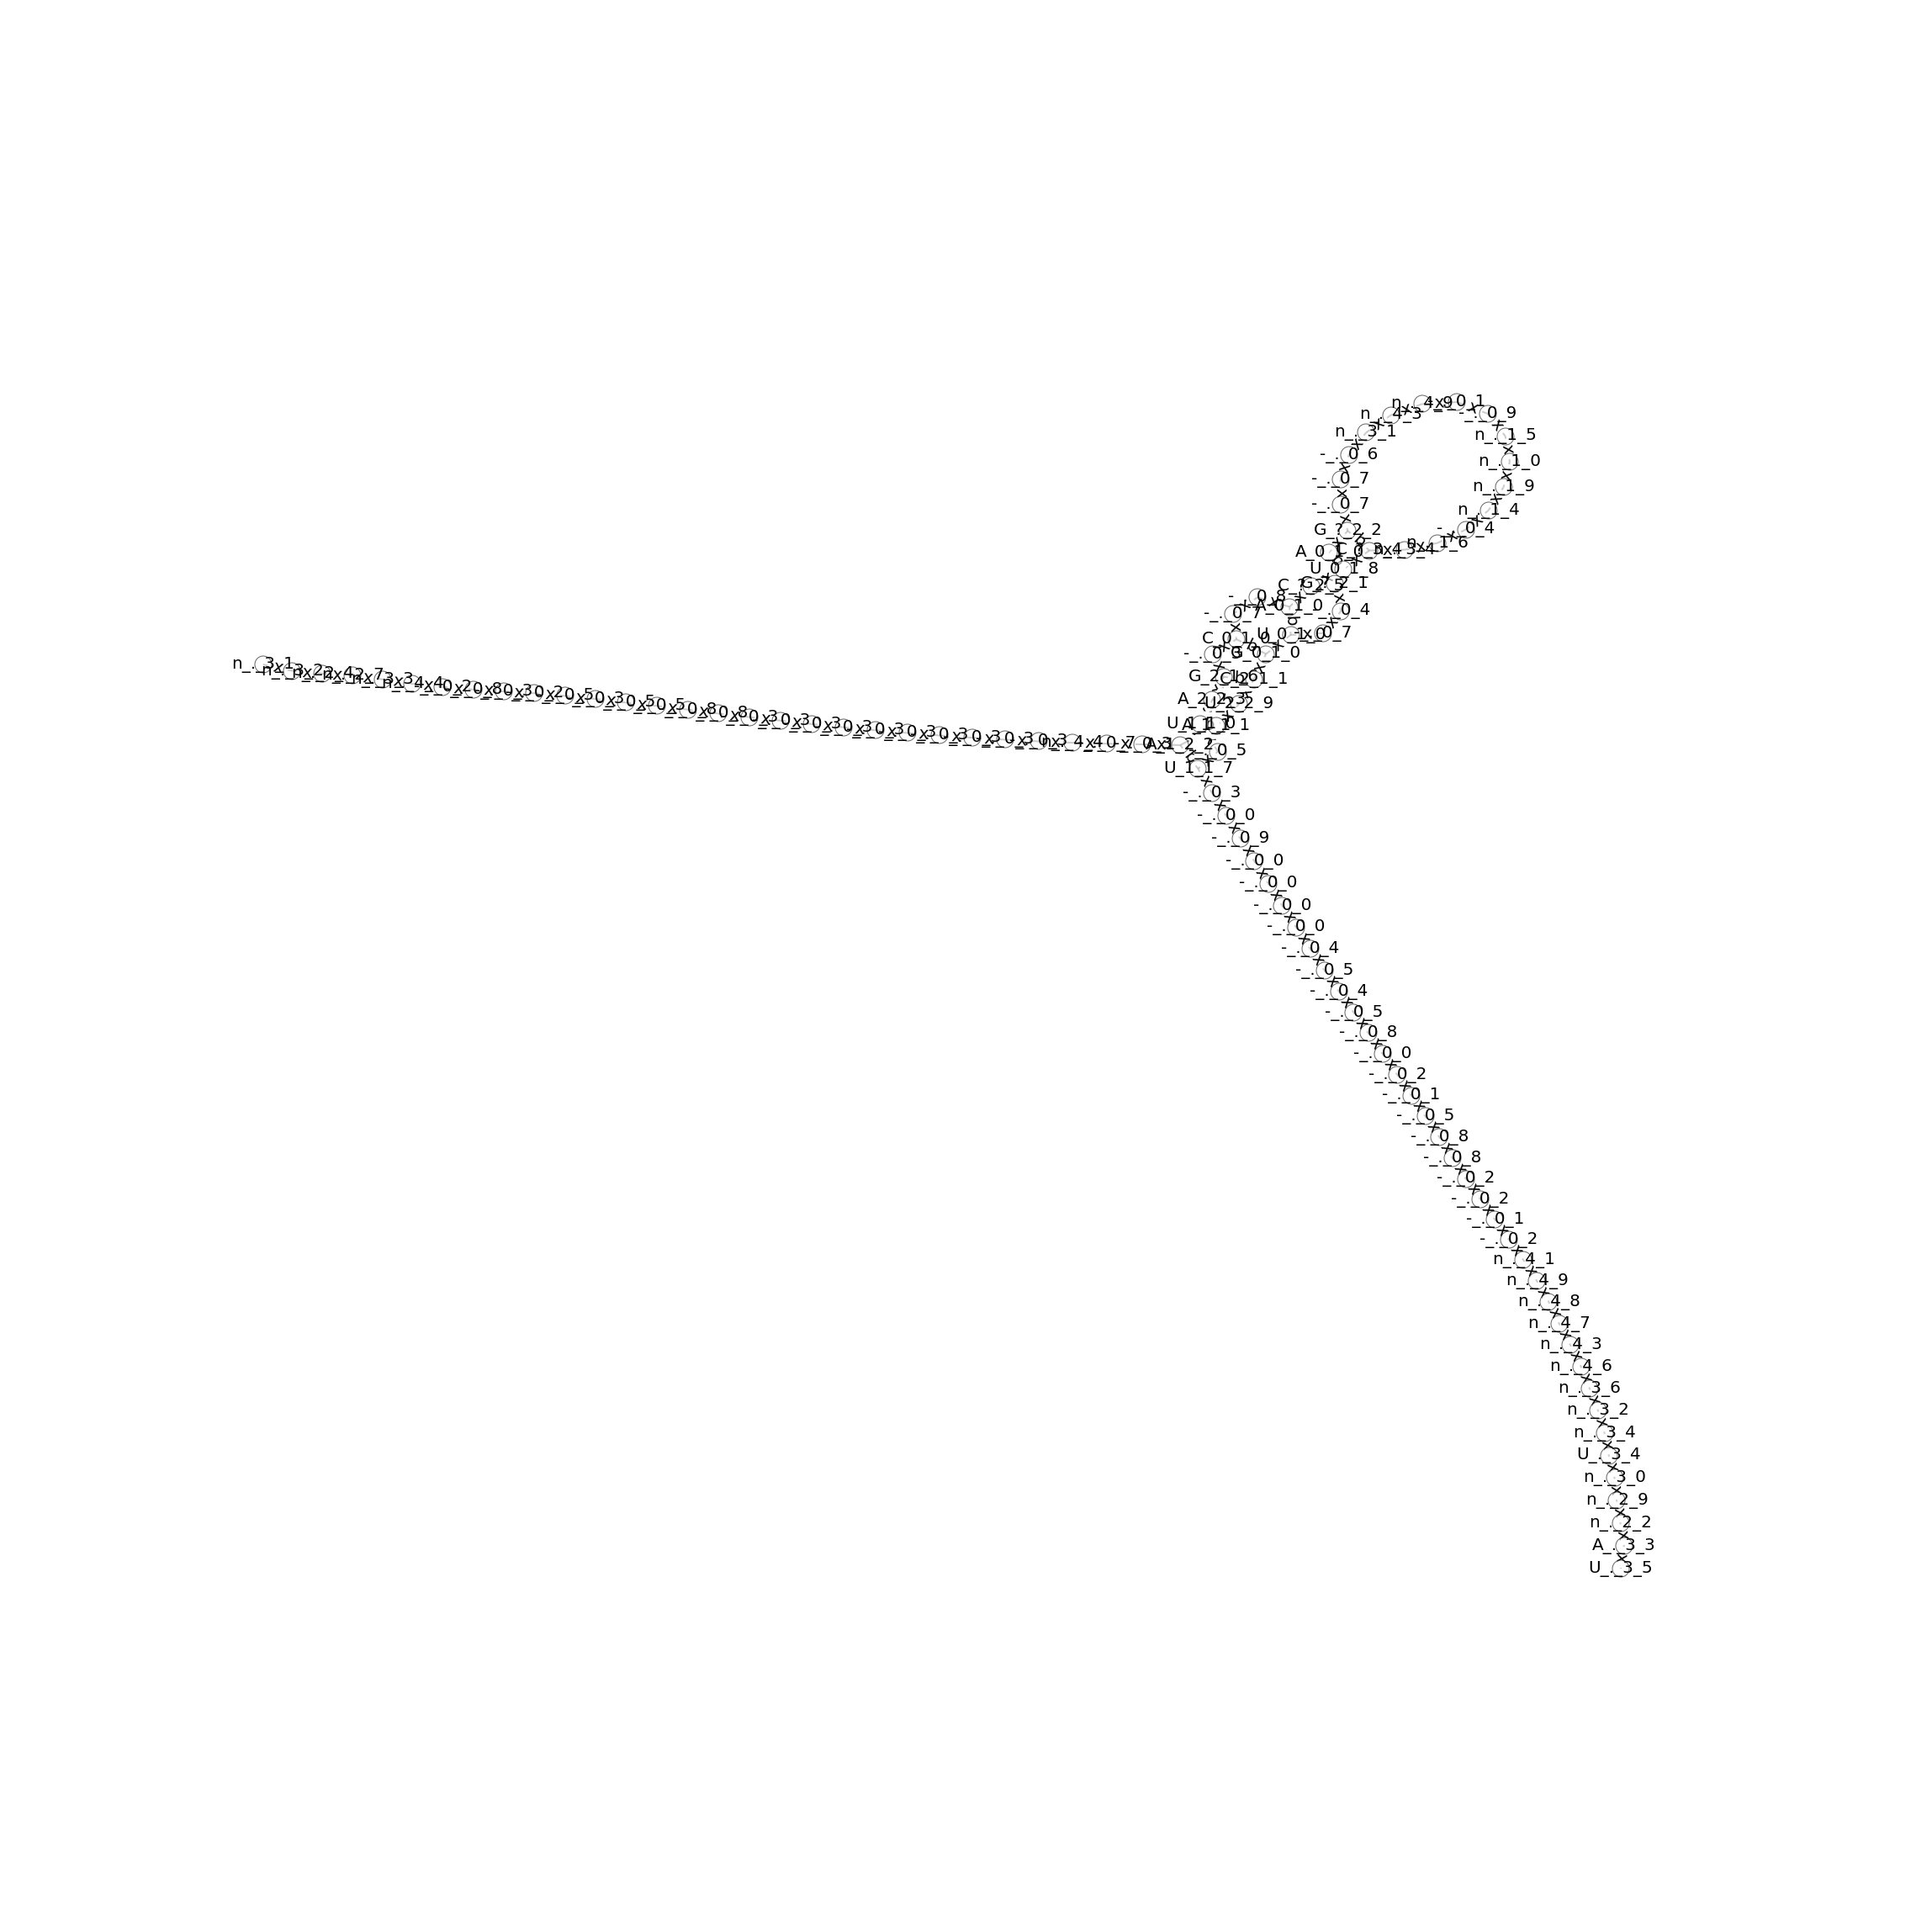

In [ ]:
for G in pos_0_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')
for G in pos_1_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')

for G in neg_0_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')
for G in neg_1_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')

#### transform the created graph to have the desired type of info(end user specification)

In [ ]:
transform_pos_0_graphs = gf.graphs_transform(pos_0_graphs, use_seq=True, use_cov = False)
transform_pos_1_graphs = gf.graphs_transform(pos_1_graphs, use_seq=True, use_cov = False)

transform_neg_0_graphs = gf.graphs_transform(neg_0_graphs, use_seq=True, use_cov = False)
transform_neg_1_graphs = gf.graphs_transform(neg_1_graphs, use_seq=True, use_cov = False)

draw the transformed graphs

In [ ]:
for G in pos_0_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')
for G in pos_1_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')

for G in neg_0_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')
for G in neg_1_graphs:
    display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato')

# Classification
This Classification Class does:

- Create target file.
- Do the modeling.

### Conversion

create target list

In [ ]:
import numpy as np

pos_0_neg_0 = [1]* len(pos_0_graphs) + [-1] * len(neg_0_graphs)
y_0_0 = np.asarray([int(value) for value in pos_0_neg_0])
pos_0_neg_1 = [1]* len(pos_0_graphs) + [-1] * len(neg_1_graphs)
y_0_1 = np.asarray([int(value) for value in pos_0_neg_1])

pos_1_neg_0 = [1]* len(pos_1_graphs) + [-1] * len(neg_0_graphs)
y_1_0 = np.asarray([int(value) for value in pos_1_neg_0])

pos_1_neg_1 = [1]* len(pos_1_graphs) + [-1] * len(neg_1_graphs)
y_1_1 = np.asarray([int(value) for value in pos_1_neg_1])

print y_0_0, y_0_1, y_1_0, y_1_1

load data and convert it to graphs

In [ ]:
from eden.converter.graph.gspan import gspan_to_eden

pos_0_neg_0_graphs = pos_0_graphs + neg_0_graphs
pos_0_neg_1_graphs = pos_0_graphs + neg_1_graphs
pos_1_neg_0_graphs = pos_1_graphs + neg_0_graphs
pos_1_neg_1_graphs = pos_1_graphs + neg_1_graphs

### Vectorizer

'''setup the vectorizer'''

In [ ]:
from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=3)

extract features and build data matrix

In [ ]:
%%time
X_p0 = vectorizer.transform(pos_0_graphs)
print ('X_p0', X_p0)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X_p0.shape[0], X_p0.shape[1],  X_p0.getnnz()/X_p0.shape[0])

X_p1 = vectorizer.transform(pos_1_graphs)
print ('X_p1', X_p1)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X_p1.shape[0], X_p1.shape[1],  X_p1.getnnz()/X_p1.shape[0])

X_n0 = vectorizer.transform(neg_0_graphs)
print ('X_n0', X_n0)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X_n0.shape[0], X_n0.shape[1],  X_n0.getnnz()/X_n0.shape[0])

X_n1 = vectorizer.transform(neg_1_graphs)
print ('X_n1', X_n1)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X_n1.shape[0], X_n1.shape[1],  X_n1.getnnz()/X_n1.shape[0])

### Modelling

the train data matrix

In [ ]:
from scipy.sparse import vstack
data_matrix_00 = vstack( [X_p0, X_n0], format="csr")
data_matrix_01 = vstack( [X_p0, X_n1], format="csr")
data_matrix_10 = vstack( [X_p1, X_n0], format="csr")
data_matrix_11 = vstack( [X_p1, X_n1], format="csr")

Induce a predictor and evaluate its performance

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
'''I know this is wrong. they should be from the same type, right!'''
score = roc_auc_score(y_1_1, data_matrix_00)